一个诊所只有一个医生，病人到来的时间是随机的，从早上九点开始，服从一个时间参数为10min的泊松过程，即每个人到来的时间服从独立同分布的指数分布，其期望为10min，每个病人到来之后，下一个病人到来的时间服从独立同分布的指数分布，期望为10min。当一个病人到来以后，将等待直到医生有空。每个医生在每个病人上花费的时间是一个随机变量，在5min到10min之间均匀分布。诊所从下午4点不再接受新病人，最后一个病人走后，诊所关门。
（1）模拟一天的病人到来和医生接诊情况，有多少个病人来诊所看病？其中有多少病人需要等待医生？平均等待时间是多少？
（2）模拟100天的情况，给出上面各个数值的分布

电面2： 和software engineer，问了一个问题，写完code问了一些如何测试code和什么是unit test之类的问题
病人每天从早上九点开始以均值为10每小时的泊松分布访问诊所，诊所接受任何在早上九点到下午四点之间的预约，医生需要把所有预约了的病人看完才能关门，医生给每个病人看病的时间服从5~20分钟的均匀分布，写代码对任意一天的情况进行仿真从而回答以下问题
#1 医生在这一天当中一共会见多少病人？
#2 在这一天当中会等待的病人总数？
#3 平均等待时间
#4 诊所关门时间

In [50]:
import numpy as np
from numpy import random as rm
import pandas as pd

In [57]:
def simulation(T=420):
    t=0; nA=0; nD=0; n=0; A=[]; D=[]; N=[]; S=[]
    tA = rm.exponential(10, 1)  #customer coming
    tD = 99999999  # customer leaving
    while True:
        if (tA<=tD) & (tA<=T): # 
            t = tA  # update time
            nA = nA+1  # update # of customer
            n = n+1
            tA = t+rm.exponential(10, 1)
            if n == 1:
                tS = rm.uniform(5, 10, 1)
                tD = t + tS  # leaving time is 
                S.append(tS)
            A.append(t)
        elif(tD <= tA) & (tA <= T):
            t = tD; n = n-1
            nD = nD + 1
            if n == 0: tD = 99999
            else:
                tS = rm.uniform(5, 10, 1)
                tD = t + tS
                S.append(tS)
            D.append(t)
            N.append(n)
        elif (tA>T): break
    while True:
        if n <= 0:break
        t = tD; n = n-1; nD = nD+1
        D.append(t)
        N.append(n)
        if n>0:
            ts = rm.uniform(5, 10, 1)
            tD = t+tS
            S.append(tS)
    Tp = max(t-T, 0)
    # A表示客来时点，D表示客走时点，N表示客走时系统中还有几人，S表示此人服务时长
    raw = {'A':A, 'D':D, 'S':S, 'N':N}
    data = pd.DataFrame(raw)
    return {'count':data.N.count(), 'wcount':sum(data.N>0), 'avgwait':float(np.mean(data.D - data.A - data.S))}



In [58]:
res = [simulation() for i in range(50)]
res = pd.DataFrame(res)
res


avgwait  count  wcount
0   13.841585     40      28
1    9.626701     47      38
2    4.295658     43      28
3    3.482336     32      17
4   10.893042     45      32
5   16.771277     51      40
6    6.590116     41      31
7    5.105391     41      29
8    6.214509     36      25
9   14.891726     46      34
10   5.772591     44      29
11   9.457714     41      28
12  31.327161     55      53
13  12.790942     61      54
14   6.066438     41      25
15   7.262637     37      24
16  10.569657     42      32
17   9.529821     40      29
18  13.242989     50      42
19   5.268558     38      25
20  10.804803     47      36
21  13.560718     43      33
22   6.279339     46      30
23   3.542548     38      21
24   4.777574     44      27
25  15.324267     45      38
26  11.157421     41      30
27   5.951483     50      35
28   9.247229     46      35
29   6.848359     43      32
30   4.617800     38      24
31   5.004950     31      19
32   4.118274     33      20
33   5.030509     38      21
34  17.587970     46      38
35  10.417286     43      32
36  18.459119     44      35
37   7.519683     37      25
38  14.634510     49      45
39  12.644459     46      36
40   3.551601     38      21
41   6.692646     39      28
42  16.190272     51      44
43   4.589577     42      28
44   3.557737     41      26
45  22.842104     53      46
46   8.301792     44      30
47  19.057018     48      38
48  14.080904     54      47
49   5.005942     35      17

(array([  7.,  17.,  12.,   9.,   2.,   1.,   0.,   0.,   1.,   1.]),
 array([  6.80138779,   8.57300979,  10.34463178,  12.11625377,
         13.88787576,  15.65949776,  17.43111975,  19.20274174,
         20.97436374,  22.74598573,  24.51760772]),
 <a list of 10 Patch objects>)

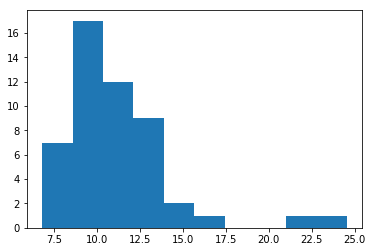

In [24]:
%matplotlib inline
import matplotlib
# 画出平均等待时间的直方图
import matplotlib.pyplot  as plt
plt.hist(res.avgwait)

1. what if there is no exponential random number generator 

In principle this allows us to generate samples of any distribution. The catch is that it may be
difficult to compute F−1. Note that this works for any CDF, continuous or discrete.

Theorem 1 Let F(x) be a CDF. Define F^−1 as above. Let U be uniformly distributed on
[0, 1]. Then the CDF of F^−1(U) is F(x).

http://math.arizona.edu/~tgk/mc/book_chap4.pdf

(array([ 45.,  26.,  16.,   3.,   3.,   2.,   2.,   1.,   1.,   1.]),
 array([  0.13440825,   5.17450301,  10.21459778,  15.25469254,
         20.2947873 ,  25.33488206,  30.37497682,  35.41507159,
         40.45516635,  45.49526111,  50.53535587]),
 <a list of 10 Patch objects>)

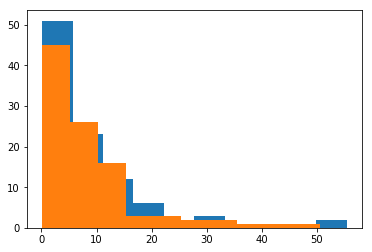

In [51]:
rdexp = rm.exponential(10, 100)
rduni = -np.log(rm.uniform(0,1,100))/0.1

import matplotlib.pyplot  as plt
plt.hist(rdexp)

import matplotlib.pyplot  as plt
plt.hist(rduni)